In [1]:
from notebook_utils import setup
import pandas as pd
from collections import defaultdict

setup()

from data_tools import load_crawled_terms
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use(["seaborn-white", "seaborn-paper"])

In [2]:
DATE = "16-dec"
DATA_DIR = "../data/{}/".format(DATE)
EXPORT_DIR = "../data/dataframes/{}/".format(DATE)

In [3]:
df_counts_by_hour = pd.read_pickle(EXPORT_DIR + 'df_counts_by_hour.pickle')

In [4]:
df_counts_by_hour.head()

,original count,quote count,tweet count,retweet count,voter fraud,election fraud,#stopthesteal,#voterfraud,#electionfraud,election interference,...,hacked voting machine,pre-filled ballot,#ilhanomarballotharvesting,#ballotvoterfraud,#votebymailfraud,#nomailinvoting,#ilhanomarvoterfraud,#hackedvotingmachines,#discardedballots,#stopgopvoterfraud
date,,,,,,,,,,,,,,,,,,,,,
2020-10-23 17:00:00+00:00,184,122,306,681.0,179,4.0,0.0,24.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-10-23 18:00:00+00:00,189,230,419,1272.0,238,9.0,0.0,22.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-10-23 19:00:00+00:00,201,208,409,561.0,250,8.0,1.0,50.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-10-23 20:00:00+00:00,329,316,645,932.0,372,18.0,0.0,77.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-10-23 21:00:00+00:00,292,247,539,847.0,322,11.0,0.0,57.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_counts_by_day = df_counts_by_hour.reset_index()
df_counts_by_day["date"] = df_counts_by_day.date.dt.floor('d')
df_counts_by_day = df_counts_by_day.groupby("date").sum()

In [6]:
df_counts_by_day[(df_counts_by_day.index > df_counts_by_day.index[11]) & (df_counts_by_day.index < df_counts_by_day.index[-1])].mean()

original count                 85450.619048
quote count                    85487.619048
tweet count                   170938.238095
retweet count                 576136.214286
voter fraud                    32779.785714
election fraud                 22002.285714
#stopthesteal                  14204.166667
#voterfraud                     4347.404762
#electionfraud                  3866.095238
election interference           2219.571429
ballot harvesting                915.404762
ballot fraud                     658.666667
#electioninterference            550.404762
election tampering               547.571429
democrats cheat                  442.880952
#voterfraudisreal                171.857143
#cheatingdemocrats               282.000000
#ballotharvesting                186.309524
cheating democrats               227.547619
#stopvoterfraud                   67.500000
stolen ballots                    59.142857
#ballotfraud                      46.976190
#democratvoterfraud             

In [7]:
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

In [8]:
period_1_start = df_counts_by_day.index[0]
period_2_start = df_counts_by_day.index[8]
period_3_start = df_counts_by_day.index[11]

periods = [
    (period_1_start, df_counts_by_day.index[3], period_2_start),
    (period_2_start, df_counts_by_day.index[9], period_3_start),
    (period_3_start, df_counts_by_day.index[30], df_counts_by_day.index[-1])
]
periods

[(Timestamp('2020-10-23 00:00:00+0000', tz='UTC'),
  Timestamp('2020-10-26 00:00:00+0000', tz='UTC'),
  Timestamp('2020-10-31 00:00:00+0000', tz='UTC')),
 (Timestamp('2020-10-31 00:00:00+0000', tz='UTC'),
  Timestamp('2020-11-01 00:00:00+0000', tz='UTC'),
  Timestamp('2020-11-03 00:00:00+0000', tz='UTC')),
 (Timestamp('2020-11-03 00:00:00+0000', tz='UTC'),
  Timestamp('2020-11-22 00:00:00+0000', tz='UTC'),
  Timestamp('2020-12-16 00:00:00+0000', tz='UTC'))]

In [9]:
election_date = df_counts_by_day.index[11]
election_date

Timestamp('2020-11-03 00:00:00+0000', tz='UTC')

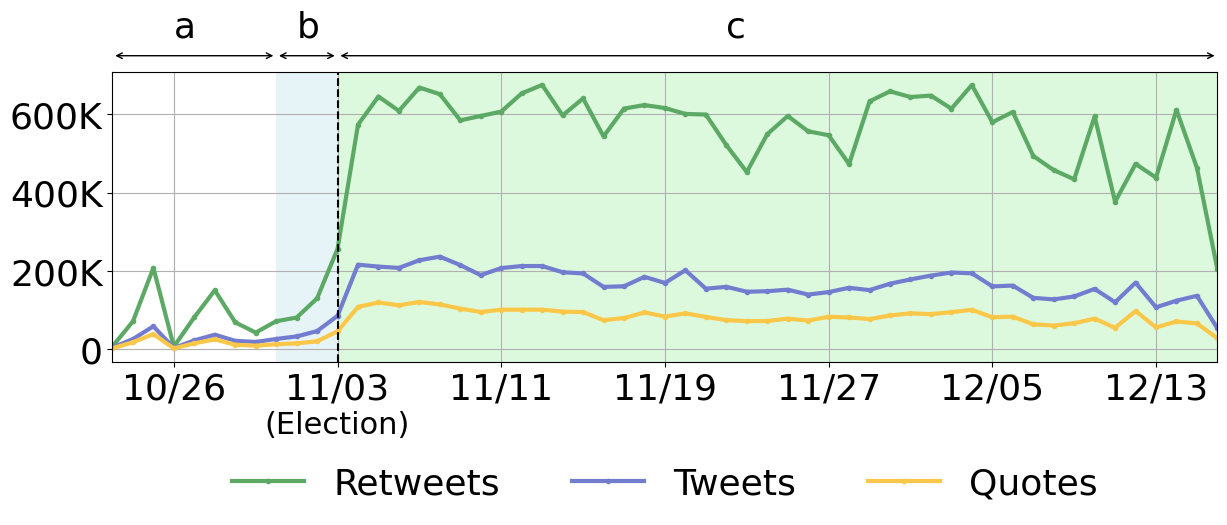

In [22]:


plot_colors = [
"#5ba965",
"#737dcf",
'#FAC748',
"#cc594e",
"#c35ca8"]
style.use("default")
fig, ax = plt.subplots(figsize=(12, 6))
params = {'legend.handlelength': 2}
plt.rcParams.update(params)
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')
total = 0
for i, col in enumerate(["retweet count", "tweet count", "quote count"]):
    data = df_counts_by_day[col]
    ticks = data.shape[0]
    #rolling_average = data.rolling("12h").mean()


    ax.plot(
        data,
        marker=".",
        linestyle="-",
        linewidth=3,
        color=plot_colors[i]
    )
    total += data.sum()

ax.set_xlim([data.index.min(), data.index.max()])
plt.rc('font', family='sans-serif')
plt.legend(["Retweets", "Tweets", "Quotes"], 
    facecolor='white', 
    framealpha=1, 
    fontsize=26,
    loc='upper center', 
    bbox_to_anchor=([0.5, -0.25]), 
    ncol=3, 
    frameon=False,
)

ax.grid()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))

#period_colors = ['teal', 'aquamarine', 'lightgreen']
period_colors = ['white', 'lightblue', 'lightgreen']
#period_colors = ['white', 'white', 'white']

for i, period in enumerate(periods):
    x1, center, x2 = period

    # shaded area
    plt.axvspan(x1, x2, color=period_colors[i], alpha=0.3, lw=0)


# Mark election
plt.axvline(election_date, color='black', linestyle='--')
plt.text(
    election_date,
    #df_counts_by_day.index[6], 
    ax.get_ylim()[0] - 125000, "(Election)",
             horizontalalignment='center',
             verticalalignment='top',
             fontsize=22,
             color='black')


period_name = ["a", "b", "c"]
for i, period in enumerate(periods):
    x1, center, x2 = period

    ax.annotate('', 
                xy=(x1, 750000),
                xytext=(x2, 750000),   
                arrowprops=dict(arrowstyle='<->',facecolor='red'),
                annotation_clip=False
    )
    ax.annotate(period_name[i], 
                xy=(center, 800000),
                xytext=(center, 800000),   
                annotation_clip=False,
                fontsize=26
    )
            

"""
ax.annotate('Election', 
            xy=(election_date, 20), xytext=(3, 50),
            textcoords='offset points', 
            arrowprops=dict(facecolor='black', shrink=0.05))
"""

plt.tight_layout()
# mdates.HourLocator(interval = 12)
interval = 8
ax.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax.yaxis.set_major_formatter(mtick.FuncFormatter(reformat_large_tick_values))
plt.tick_params(axis='both', which='major', labelsize=26)
fig.savefig("./tweets_over_time.pdf", bbox_inches='tight')
plt.show()
# ax.set_title("#voterfraud ({:,.0f} entities)".format(total))


In [11]:
df_recent_tweets = pd.read_pickle("../data/dataframes/14-nov/df_recent_tweets.pickle").set_index("datastore_id")

In [12]:
df_recent_tweets = df_recent_tweets.set_index("datastore_id")

KeyError: "None of ['datastore_id'] are in the columns"

In [54]:
data_by_date[date]["ferrara_retweets"].head()

,user_id,id,retweeted_id,full_text,timestamp,hashtags
0,1243690009577893894,1324788627025633281,1324357146088267777,RT @Al_Sanchino: It’s wild Trump supporters be...,Fri Nov 06 18:59:56 +0000 2020,[]
1,2158429034,1324788631022678016,1324532853275766789,RT @RaheemKassam: Republicans aren’t losing in...,Fri Nov 06 18:59:57 +0000 2020,[]
2,173841612,1324788631396036613,1324785959871959040,RT @ChuckCallesto: BREAKING REPORT: Chair of t...,Fri Nov 06 18:59:57 +0000 2020,[]
3,995758793404362752,1324788635485589513,1324785959871959040,RT @ChuckCallesto: BREAKING REPORT: Chair of t...,Fri Nov 06 18:59:58 +0000 2020,[]
4,67118922,1324788635535888384,1324783662915899395,RT @replouiegohmert: I'm in Philly where voter...,Fri Nov 06 18:59:58 +0000 2020,[counteverylegalvote]


In [13]:
data_by_date = {
    "11-06": {},
    "11-13": {}
}

for date in data_by_date.keys():
    data_by_date[date]["our_tweets"] = pd.read_pickle("../data/dataframes/14-nov/df_tweets_2020-{}.pickle".format(date))
    data_by_date[date]["our_tweets"]["id"] = data_by_date[date]["our_tweets"]["datastore_id"]
    data_by_date[date]["our_retweets"] = pd.read_pickle("../data/dataframes/14-nov/df_retweets_2020-{}.pickle".format(date))
    data_by_date[date]["ferrara_tweets"] = pd.read_pickle("../data/dataframes/14-nov/df_ferrara_tweets_2020-{}.pickle".format(date))
    data_by_date[date]["ferrara_tweets"]["text"] = data_by_date[date]["ferrara_tweets"]["full_text"]
    data_by_date[date]["ferrara_retweets"] = pd.read_pickle("../data/dataframes/14-nov/df_ferrara_retweets_2020-{}.pickle".format(date))

In [14]:
def does_tweet_contain_crawled_terms(tweet_text, tweet_hashtags):
    lowered_hashtags = [x.lower() for x in tweet_hashtags]
    
    for hashtag in lowered_hashtags:
        if (hashtag in crawled_hashtag_map):
            return True
    
    lowered_text = tweet_text.lower()
    for crawled_phrase in crawled_phrases:
        if crawled_phrase in lowered_text:
            return True
    return False

def does_tweet_contain_phrase(lowered_text, lowered_phrase):
    if lowered_phrase in lowered_text:
        return True 
    return False

def filter_by_crawled_terms(df, selected_phrase=None):
    if (selected_phrase):
        lowered_phrase = selected_phrase.lower()
        mask = df.apply(lambda tweet: does_tweet_contain_phrase(tweet["text"].lower(), lowered_phrase), axis=1)
    else:
        mask = df.apply(lambda tweet: does_tweet_contain_crawled_terms(tweet["text"], tweet["hashtags"]), axis=1)

    return df[mask]

In [15]:
crawled_terms, crawled_hashtags, crawled_phrases = load_crawled_terms("../keywords-3nov.txt", split_hashtags=True)
lowered_crawled_terms = [term.lower() for term in crawled_terms]
crawled_hashtag_map = {k: True for k in crawled_hashtags}

In [16]:
date = "11-06"
print(data_by_date[date]["our_retweets"])

                    timestamp                 user            retweeted  \
0        2020-11-06T12:15:06Z  1000007327884378114  1324519566781911040   
7        2020-11-06T09:43:09Z  1000008318692286464  1324357146088267777   
9        2020-11-06T08:52:00Z  1000008614185177088  1324357146088267777   
12       2020-11-06T17:48:10Z  1000008988266827776  1324357146088267777   
18       2020-11-06T05:00:50Z           1000009794  1324572541453783040   
...                       ...                  ...                  ...   
8044888  2020-11-06T12:46:03Z  1197256137017573377  1324689920649252864   
8044918  2020-11-06T07:09:59Z  1197263042674855937  1324487039274942464   
8044919  2020-11-06T05:01:34Z  1197263042674855937  1324570560542724096   
8044920  2020-11-06T17:01:43Z  1197263042674855937  1324758155570667525   
8044938  2020-11-06T23:46:31Z  1197264373284245505  1324815627266199554   

         retweetedFrom_user  
0                 139850096  
7                1416374742  
9        

In [17]:
filter_by = "voter fraud"

for date in data_by_date.keys():
    our_filtered = filter_by_crawled_terms(data_by_date[date]["our_tweets"], filter_by)
    ferrara_filtered = filter_by_crawled_terms(data_by_date[date]["ferrara_tweets"], filter_by)
    data_by_date[date]["our_tweets_by_terms"] = our_filtered
    data_by_date[date]["ferrara_tweets_by_terms"] = ferrara_filtered
    data_by_date[date]["our_tweet_ids"] = set(our_filtered["id"])
    data_by_date[date]["ferrara_tweet_ids"] = set(ferrara_filtered["id"])

    

In [18]:
def format_date(date):
    if (date == "11-06"):
        return "Nov 6th"
    else:
        return "Nov 13th"

df_data = {}
for date in data_by_date.keys():
    our = data_by_date[date]["our_tweet_ids"]
    ferrara = data_by_date[date]["ferrara_tweet_ids"]
    
    df_data[format_date(date)] = {
        "our": len(our - ferrara),
        "intersection": len(our.intersection(ferrara)),
        "union": len(our.union(ferrara)),
        "ferrara": len(ferrara - our)
    }
df_coverage_comparison = pd.DataFrame(df_data).T

In [19]:
df_coverage_comparison["ferrara_pct"] =  df_coverage_comparison.apply(lambda x: ((x["ferrara"] / x["union"]) * 100).round(2), axis=1)
df_coverage_comparison["our_pct"] =  df_coverage_comparison.apply(lambda x: ((x["our"] / x["union"]) * 100).round(2), axis=1)
df_coverage_comparison["intersection_pct"] =  df_coverage_comparison.apply(lambda x: ((x["intersection"] / x["union"]) * 100).round(2), axis=1)
df_coverage_comparison

,our,intersection,union,ferrara,ferrara_pct,our_pct,intersection_pct
Nov 6th,39003,6319,58696,13374,22.79,66.45,10.77
Nov 13th,34255,13058,49459,2146,4.34,69.26,26.40


2021-01-15 17:02:11.992 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-01-15 17:02:11.994 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-01-15 17:02:11.997 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-01-15 17:02:12.002 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
1


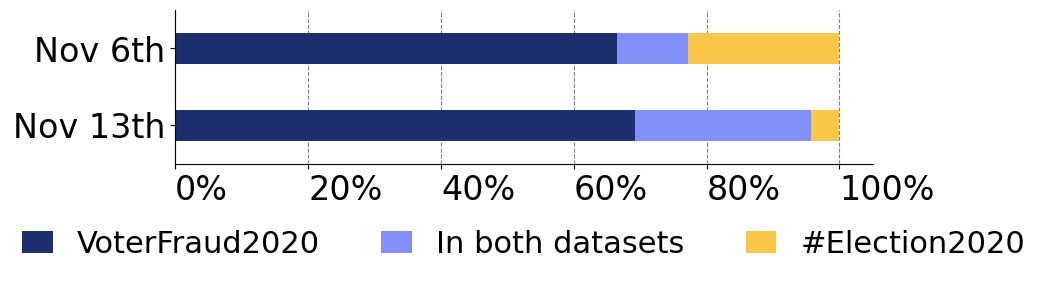

In [23]:
fig, ax = plt.subplots(1, figsize=(9, 2))

params = {'legend.handlelength': 1}
plt.rcParams.update(params)
fields = ["our_pct", "intersection_pct", "ferrara_pct"]
colors = ['#1D2F6F', '#8390FA', '#FAC748']
labels = ["VoterFraud2020", "In both datasets", "#Election2020"]

plot_df = df_coverage_comparison.iloc[::-1]

left = len(plot_df.index) * [0]
for idx, name in enumerate(fields):
    plt.barh(plot_df.index, plot_df[name], left=left, color=colors[idx], height=0.4, align="center")
    left += plot_df[name]

# remove spines
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

# title, legend, labels
plt.rc('font', family='sans-serif')
plt.legend(labels, 
    bbox_to_anchor=([0.5, -0.25]), 
    ncol=3, 
    frameon=False, 
    fontsize=22,
    loc='upper center'
)


print(ax.get_yticks()[-1])
# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.tick_params(axis='both', which='major', labelsize=24)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")
fig.savefig("./ferrara_comparison.pdf", bbox_inches='tight')

In [27]:
fields = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
labels = ['NA', 'EU', 'JP', 'Others']
# figure and axis
fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
left = len(df_grouped) * [0]
for idx, name in enumerate(fields):
    plt.barh(df_grouped.index, df_grouped[name], left = left, color=colors[idx])
    left = left + df_grouped[name]
# title, legend, labels
plt.title('Video Game Sales By Platform and Region\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Millions of copies of all games')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

NameError: name 'df_grouped' is not defined